### Import data and the general exploratory

In [280]:
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import datetime
from pandas import DataFrame
from datetime import datetime

In [281]:
#import os
#os.chdir("D:\Machine learning-project")
path0 = 'https://areaprobe.s3.us-east-2.amazonaws.com/iot_api_statistics.csv'
path1 = 'https://areaprobe.s3.us-east-2.amazonaws.com/iot_weather_conditions.csv'
df1 = pd.read_csv(path0) 
df2 = pd.read_csv(path1) 

C:\Users\yuezh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [282]:
df1.describe()

,ID,user_ID,device_lat,device_long,count,temp,humidity,year,month,day,hour,minutes,week,timestamp
count,821482.000000,821482.0,8.214820e+05,8.214820e+05,821482.000000,821482.000000,821355.000000,821482.0,821482.000000,821482.000000,821482.000000,821482.000000,821482.000000,8.214820e+05
mean,410743.051879,0.0,3.890085e+01,-7.699125e+01,1.000019,58.761499,44.276370,2020.0,3.209447,15.936180,11.589111,29.508059,12.567557,1.584976e+09
std,237141.999606,0.0,5.287223e-10,6.622262e-11,0.008827,12.084066,18.577255,0.0,1.387337,8.446263,6.858673,17.324692,5.637205,3.408888e+06
min,2.000000,0.0,3.890085e+01,-7.699125e+01,1.000000,26.600000,5.000000,2020.0,1.000000,1.000000,0.000000,0.000000,2.000000,1.578393e+09
25%,205372.250000,0.0,3.890085e+01,-7.699125e+01,1.000000,50.540000,30.000000,2020.0,2.000000,9.000000,6.000000,14.000000,7.000000,1.581711e+09
50%,410743.500000,0.0,3.890085e+01,-7.699125e+01,1.000000,57.560000,42.000000,2020.0,3.000000,16.000000,12.000000,30.000000,13.000000,1.585159e+09
75%,616113.750000,0.0,3.890085e+01,-7.699125e+01,1.000000,65.660000,59.000000,2020.0,4.000000,23.000000,17.000000,45.000000,17.000000,1.587758e+09
max,821484.000000,0.0,3.890085e+01,-7.699125e+01,5.000000,1830.200000,999.000000,2020.0,6.000000,31.000000,23.000000,59.000000,24.000000,1.592053e+09


In [283]:
df2.describe()

,ID,user_id,icon,temp
count,74.000000,74.0,74.000000,74.000000
mean,46.824324,1.0,8.918919,68.527027
std,22.291566,0.0,6.232387,13.217074
min,9.000000,1.0,1.000000,49.000000
25%,27.250000,1.0,4.000000,58.000000
50%,47.500000,1.0,6.000000,64.000000
75%,65.750000,1.0,14.000000,78.000000
max,84.000000,1.0,30.000000,97.000000


In [284]:
df1.head()

,ID,user_ID,device_ID,device address,device_lat,device_long,company,count,temp,humidity,year,month,day,hour,minutes,week,weekday,date,timestamp
0,342335,0,0,1005 h Street ne,38.900846,-76.991246,h street main street,1,49.10,55.0,2020,3,16,2,2,12,Mon,3/16/20 2:02,1584338576
1,2,0,0,1005 h Street ne,38.900846,-76.991246,h street main street,1,32.00,77.0,2020,1,7,16,2,2,Tue,1/7/20 16:02,1578393168
2,3,0,0,1005 h Street ne,38.900846,-76.991246,h street main street,1,64.04,78.0,2020,1,7,16,2,2,Tue,1/7/20 16:02,1578393171
3,4,0,0,1005 h Street ne,38.900846,-76.991246,h street main street,1,32.00,78.0,2020,1,7,16,3,2,Tue,1/7/20 16:03,1578393192
4,5,0,0,1005 h Street ne,38.900846,-76.991246,h street main street,1,64.22,77.0,2020,1,7,16,3,2,Tue,1/7/20 16:03,1578393208


In [285]:
df2.head()

,ID,user_id,icon,IconPhrase,ShortPhrase,LongPhrase,temp,precipitation_type,weather_cast,date
0,10,1,15,NaN,A heavy afternoon thunderstorm,NaN,62,Rain,Rain,3/3/20
1,9,1,6,NaN,Increasing cloudiness,NaN,57,Sunny,Sunny,3/6/20
2,11,1,12,NaN,Rain and drizzle this morning,NaN,53,Rain,Rain,3/7/20
3,12,1,1,NaN,"Sunny, pleasant and warmer",NaN,62,Sunny,Sunny,3/8/20
4,13,1,1,NaN,"Sunny, pleasant and warmer",NaN,62,Sunny,Sunny,3/9/20


In [286]:
df1.shape

(821482, 19)

In [287]:
df2.shape

(74, 10)

### Data Clean for iot_api_statistics.csv

#### Check missing values

In [288]:
df1.isnull().sum()

ID                     0
user_ID                0
device_ID         453352
device address         0
device_lat             0
device_long            0
company                0
count                  0
temp                   0
humidity             127
year                   0
month                  0
day                    0
hour                   0
minutes                0
week                   0
weekday                0
date                   0
timestamp              0
dtype: int64

Only the columns device_ID and humidity have missing values.

From Trifacta, it has been found that the column, 'device_ID' has either missing values or the constant values, 0. So the column, 'device_ID' can be dropped.

In [289]:
df1.drop('device_ID',inplace=True,axis=1)

Since the histogram for 'humidity' is normally distributed, we can fill the missing values of 'humidity' as its mean value.

In [290]:
df1["humidity"] = df1["humidity"].fillna(value=df1["humidity"].mean())

In [291]:
df1.isnull().sum()

ID                0
user_ID           0
device address    0
device_lat        0
device_long       0
company           0
count             0
temp              0
humidity          0
year              0
month             0
day               0
hour              0
minutes           0
week              0
weekday           0
date              0
timestamp         0
dtype: int64

Now we don't have missing values anymore.

#### Check the constant values

In [292]:
for col in df1.columns:
    if len(df1[col].unique()) == 1:
        print(col)

user_ID
device address
device_lat
device_long
company
year


There are 6 columns in total have the constant values. Then we drop the 6 columns.

In [293]:
for col in df1.columns:
    if len(df1[col].unique()) == 1:
        df1.drop(col,inplace=True,axis=1)

df1.head()

,ID,count,temp,humidity,month,day,hour,minutes,week,weekday,date,timestamp
0,342335,1,49.10,55.0,3,16,2,2,12,Mon,3/16/20 2:02,1584338576
1,2,1,32.00,77.0,1,7,16,2,2,Tue,1/7/20 16:02,1578393168
2,3,1,64.04,78.0,1,7,16,2,2,Tue,1/7/20 16:02,1578393171
3,4,1,32.00,78.0,1,7,16,3,2,Tue,1/7/20 16:03,1578393192
4,5,1,64.22,77.0,1,7,16,3,2,Tue,1/7/20 16:03,1578393208


Also, from Trifacta, for the column, 'count', there are 82808 rows with the value, 1. And the rest 4 rows has the value, 5. Since almost all the rows for this feature have the value, 1. It can be considered as the quasi-constant feature, and we can drop it.

In [294]:
df1.drop('count',inplace=True,axis=1)

#### Split the 'date' column into 'date2' and 'time'

In [295]:
date1 = df1["date"].str.split(" ", n = 1, expand = True) 
df1["date2"]= date1[0] 
df1["time"]= date1[1] 
df1.head()

,ID,temp,humidity,month,day,hour,minutes,week,weekday,date,timestamp,date2,time
0,342335,49.10,55.0,3,16,2,2,12,Mon,3/16/20 2:02,1584338576,3/16/20,2:02
1,2,32.00,77.0,1,7,16,2,2,Tue,1/7/20 16:02,1578393168,1/7/20,16:02
2,3,64.04,78.0,1,7,16,2,2,Tue,1/7/20 16:02,1578393171,1/7/20,16:02
3,4,32.00,78.0,1,7,16,3,2,Tue,1/7/20 16:03,1578393192,1/7/20,16:03
4,5,64.22,77.0,1,7,16,3,2,Tue,1/7/20 16:03,1578393208,1/7/20,16:03


In [296]:
len(df1['date2'].unique())

123

### Data Clean for iot_weather_conditions.csv

In [297]:
df2.head()

,ID,user_id,icon,IconPhrase,ShortPhrase,LongPhrase,temp,precipitation_type,weather_cast,date
0,10,1,15,NaN,A heavy afternoon thunderstorm,NaN,62,Rain,Rain,3/3/20
1,9,1,6,NaN,Increasing cloudiness,NaN,57,Sunny,Sunny,3/6/20
2,11,1,12,NaN,Rain and drizzle this morning,NaN,53,Rain,Rain,3/7/20
3,12,1,1,NaN,"Sunny, pleasant and warmer",NaN,62,Sunny,Sunny,3/8/20
4,13,1,1,NaN,"Sunny, pleasant and warmer",NaN,62,Sunny,Sunny,3/9/20


In [298]:
df2["date2"]= df2['date']

In [299]:
df3 = df1.merge(df2, on='date2', how='left')

In [300]:
df3.head()

,ID_x,temp_x,humidity,month,day,hour,minutes,week,weekday,date_x,...,ID_y,user_id,icon,IconPhrase,ShortPhrase,LongPhrase,temp_y,precipitation_type,weather_cast,date_y
0,342335,49.10,55.0,3,16,2,2,12,Mon,3/16/20 2:02,...,20.0,1.0,12.0,Showers,A little rain in the morning,"A little morning rain; otherwise, mostly cloudy",52.0,Rain,Rain,3/16/20
1,2,32.00,77.0,1,7,16,2,2,Tue,1/7/20 16:02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,64.04,78.0,1,7,16,2,2,Tue,1/7/20 16:02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,32.00,78.0,1,7,16,3,2,Tue,1/7/20 16:03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,64.22,77.0,1,7,16,3,2,Tue,1/7/20 16:03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
df3.shape

(821482, 23)

In [302]:
df3.isnull().sum()

ID_x                       0
temp_x                     0
humidity                   0
month                      0
day                        0
hour                       0
minutes                    0
week                       0
weekday                    0
date_x                     0
timestamp                  0
date2                      0
time                       0
ID_y                  514633
user_id               514633
icon                  514633
IconPhrase            514633
ShortPhrase           514633
LongPhrase            514633
temp_y                514633
precipitation_type    671880
weather_cast          514633
date_y                514633
dtype: int64

In [303]:
df3.drop('user_id',inplace=True,axis=1)
df3.drop('LongPhrase',inplace=True,axis=1)

In [304]:
len(df3['date_y'].unique())

48

In [305]:
hr_ct = df3.hour.value_counts()

In [306]:
hr_ct = hr_ct.to_frame()
hr_ct = hr_ct.sort_index()

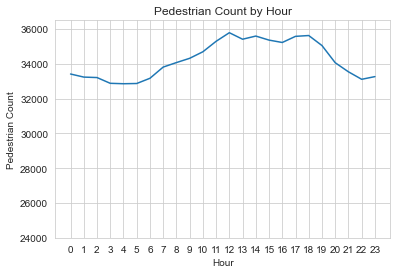

In [307]:
# Create plot
height = hr_ct['hour']
bars = list(hr_ct.index)
y_pos = np.arange(len(bars))

plt.plot(y_pos, height)
plt.xticks(y_pos, bars)

plt.title('Pedestrian Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Pedestrian Count')

plt.ylim(24000, 36500)

plt.show()

### retrieve weather condition data from API

Since there are a lot of missing days for the weather table. So I choose to retrieve weather data from API (hourly, from 1/1/2020 to 6/30/2020)

In [308]:
#! pip install wwo-hist
from wwo_hist import retrieve_hist_data

In [310]:
frequency = 1
start_date = '1-JAN-2020'
end_date = '30-JUN-2020'
api_key = '2d8ad40f3ff84de3b1b62132201007'

# The zip code of the street is 20002
location_list = ['20002']
hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)

In [311]:
weather_api = pd.read_csv('20002.csv')

In [312]:
weather_api.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2020-01-01 00:00:00,9,3,0.0,8.7,3,37,12:35 PM,No moonset,08:26 AM,...,21,24,66,0.0,1008,6,10,303,13,20002
1,2020-01-01 01:00:00,9,3,0.0,8.7,3,37,12:35 PM,No moonset,08:26 AM,...,19,22,67,0.0,1008,5,10,303,12,20002
2,2020-01-01 02:00:00,9,3,0.0,8.7,3,37,12:35 PM,No moonset,08:26 AM,...,17,19,68,0.0,1008,5,10,302,11,20002
3,2020-01-01 03:00:00,9,3,0.0,8.7,3,37,12:35 PM,No moonset,08:26 AM,...,15,17,69,0.0,1008,4,10,302,10,20002
4,2020-01-01 04:00:00,9,3,0.0,8.7,3,37,12:35 PM,No moonset,08:26 AM,...,14,18,70,0.0,1009,4,10,294,9,20002


In [313]:
date1 = weather_api["date_time"].str.split(" ", n = 1, expand = True) 
weather_api["date2"]= date1[0] 
weather_api["time"]= date1[1] 
weather_api.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,date2,time
0,2020-01-01 00:00:00,9,3,0.0,8.7,3,37,12:35 PM,No moonset,08:26 AM,...,66,0.0,1008,6,10,303,13,20002,2020-01-01,00:00:00
1,2020-01-01 01:00:00,9,3,0.0,8.7,3,37,12:35 PM,No moonset,08:26 AM,...,67,0.0,1008,5,10,303,12,20002,2020-01-01,01:00:00
2,2020-01-01 02:00:00,9,3,0.0,8.7,3,37,12:35 PM,No moonset,08:26 AM,...,68,0.0,1008,5,10,302,11,20002,2020-01-01,02:00:00
3,2020-01-01 03:00:00,9,3,0.0,8.7,3,37,12:35 PM,No moonset,08:26 AM,...,69,0.0,1008,4,10,302,10,20002,2020-01-01,03:00:00
4,2020-01-01 04:00:00,9,3,0.0,8.7,3,37,12:35 PM,No moonset,08:26 AM,...,70,0.0,1009,4,10,294,9,20002,2020-01-01,04:00:00


#### Merge iot_api_statistics table with weather condition table, and create the hourly pedestrian count table 

In [314]:
df1.head()

,ID,temp,humidity,month,day,hour,minutes,week,weekday,date,timestamp,date2,time
0,342335,49.10,55.0,3,16,2,2,12,Mon,3/16/20 2:02,1584338576,3/16/20,2:02
1,2,32.00,77.0,1,7,16,2,2,Tue,1/7/20 16:02,1578393168,1/7/20,16:02
2,3,64.04,78.0,1,7,16,2,2,Tue,1/7/20 16:02,1578393171,1/7/20,16:02
3,4,32.00,78.0,1,7,16,3,2,Tue,1/7/20 16:03,1578393192,1/7/20,16:03
4,5,64.22,77.0,1,7,16,3,2,Tue,1/7/20 16:03,1578393208,1/7/20,16:03


In [315]:
from datetime import datetime

ts = []
for value in df1['timestamp']:
    dt_object = datetime.fromtimestamp(value)
    ts.append(dt_object.strftime("%Y-%m-%d %H"))
    

In [316]:
ts = DataFrame(ts,columns=['date_hr'])

In [317]:
df1['date_hr'] = ts['date_hr']
df1.head()

,ID,temp,humidity,month,day,hour,minutes,week,weekday,date,timestamp,date2,time,date_hr
0,342335,49.10,55.0,3,16,2,2,12,Mon,3/16/20 2:02,1584338576,3/16/20,2:02,2020-03-16 02
1,2,32.00,77.0,1,7,16,2,2,Tue,1/7/20 16:02,1578393168,1/7/20,16:02,2020-01-07 05
2,3,64.04,78.0,1,7,16,2,2,Tue,1/7/20 16:02,1578393171,1/7/20,16:02,2020-01-07 05
3,4,32.00,78.0,1,7,16,3,2,Tue,1/7/20 16:03,1578393192,1/7/20,16:03,2020-01-07 05
4,5,64.22,77.0,1,7,16,3,2,Tue,1/7/20 16:03,1578393208,1/7/20,16:03,2020-01-07 05


In [318]:
date_hr = weather_api["date_time"].str.split(":", n = 1, expand = True) 
weather_api["date_hr"]= date_hr[0] 

In [319]:
weather_api1 = weather_api[['date_hr','time','date2','humidity','cloudcover','windspeedKmph','visibility','tempC','precipMM']].copy()

In [320]:
weather_api1.head()

,date_hr,time,date2,humidity,cloudcover,windspeedKmph,visibility,tempC,precipMM
0,2020-01-01 00,00:00:00,2020-01-01,66,24,13,10,6,0.0
1,2020-01-01 01,01:00:00,2020-01-01,67,22,12,10,5,0.0
2,2020-01-01 02,02:00:00,2020-01-01,68,19,11,10,5,0.0
3,2020-01-01 03,03:00:00,2020-01-01,69,17,10,10,4,0.0
4,2020-01-01 04,04:00:00,2020-01-01,70,18,9,10,4,0.0


In [321]:
hr_df = df1.merge(weather_api1, on='date_hr', how='left')

In [322]:
hr_df.head()

,ID,temp,humidity_x,month,day,hour,minutes,week,weekday,date,...,time_x,date_hr,time_y,date2_y,humidity_y,cloudcover,windspeedKmph,visibility,tempC,precipMM
0,342335,49.10,55.0,3,16,2,2,12,Mon,3/16/20 2:02,...,2:02,2020-03-16 02,02:00:00,2020-03-16,75,9,5,10,5,0.0
1,2,32.00,77.0,1,7,16,2,2,Tue,1/7/20 16:02,...,16:02,2020-01-07 05,05:00:00,2020-01-07,57,15,6,10,3,0.0
2,3,64.04,78.0,1,7,16,2,2,Tue,1/7/20 16:02,...,16:02,2020-01-07 05,05:00:00,2020-01-07,57,15,6,10,3,0.0
3,4,32.00,78.0,1,7,16,3,2,Tue,1/7/20 16:03,...,16:03,2020-01-07 05,05:00:00,2020-01-07,57,15,6,10,3,0.0
4,5,64.22,77.0,1,7,16,3,2,Tue,1/7/20 16:03,...,16:03,2020-01-07 05,05:00:00,2020-01-07,57,15,6,10,3,0.0


In [323]:
hr_df.isnull().sum()

ID               0
temp             0
humidity_x       0
month            0
day              0
hour             0
minutes          0
week             0
weekday          0
date             0
timestamp        0
date2_x          0
time_x           0
date_hr          0
time_y           0
date2_y          0
humidity_y       0
cloudcover       0
windspeedKmph    0
visibility       0
tempC            0
precipMM         0
dtype: int64

In [324]:
hr_df2 = hr_df.date_hr.value_counts()

In [325]:
hr_df2 = hr_df2.to_frame()

In [326]:
hr_df2['hr_count'] = hr_df2['date_hr']
hr_df2['date_hr'] = hr_df2.index

hr_df2.head()

,date_hr,hr_count
2020-03-14 14,2020-03-14 14,550
2020-02-21 16,2020-02-21 16,393
2020-02-14 12,2020-02-14 12,392
2020-02-21 18,2020-02-21 18,390
2020-02-21 15,2020-02-21 15,388


In [327]:
hr_df2_visibility = hr_df.groupby('date_hr', as_index=False)['visibility'].mean()
hr_df2_visibility.head()

,date_hr,visibility
0,2020-01-07 05,10
1,2020-01-07 13,9
2,2020-01-13 12,10
3,2020-01-15 14,10
4,2020-01-15 15,10


In [328]:
hr_df2_humidity_x = hr_df.groupby('date_hr', as_index=False)['humidity_x'].mean()
hr_df2_humidity_x.head()

,date_hr,humidity_x
0,2020-01-07 05,77.428571
1,2020-01-07 13,31.181818
2,2020-01-13 12,53.500000
3,2020-01-15 14,33.000000
4,2020-01-15 15,28.388889


In [329]:
hr_df2_cloudcover = hr_df.groupby('date_hr', as_index=False)['cloudcover'].mean()
hr_df2_cloudcover.head()

,date_hr,cloudcover
0,2020-01-07 05,15
1,2020-01-07 13,100
2,2020-01-13 12,52
3,2020-01-15 14,6
4,2020-01-15 15,8


In [330]:
hr_df2_windspeedKmph = hr_df.groupby('date_hr', as_index=False)['windspeedKmph'].mean()
hr_df2_windspeedKmph.head()

,date_hr,windspeedKmph
0,2020-01-07 05,6
1,2020-01-07 13,12
2,2020-01-13 12,5
3,2020-01-15 14,4
4,2020-01-15 15,4


In [331]:
hr_df2_temp = hr_df.groupby('date_hr', as_index=False)['temp'].mean()
hr_df2_temp.head()

,date_hr,temp
0,2020-01-07 05,65.518571
1,2020-01-07 13,73.858182
2,2020-01-13 12,75.740000
3,2020-01-15 14,75.596000
4,2020-01-15 15,79.480000


In [332]:
hr_df2_precipMM = hr_df.groupby('date_hr', as_index=False)['precipMM'].mean()
hr_df2_precipMM.head()

,date_hr,precipMM
0,2020-01-07 05,0.0
1,2020-01-07 13,0.0
2,2020-01-13 12,0.0
3,2020-01-15 14,0.0
4,2020-01-15 15,0.0


In [333]:
hr_df3 = hr_df2.merge(hr_df2_visibility, on='date_hr', how='left')
hr_df3 = hr_df3.merge(hr_df2_humidity_x, on='date_hr', how='left')
hr_df3 = hr_df3.merge(hr_df2_cloudcover, on='date_hr', how='left')
hr_df3 = hr_df3.merge(hr_df2_windspeedKmph, on='date_hr', how='left')
hr_df3 = hr_df3.merge(hr_df2_temp, on='date_hr', how='left')
hr_df3 = hr_df3.merge(hr_df2_precipMM, on='date_hr', how='left')
hr_df3.head()

,date_hr,hr_count,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM
0,2020-03-14 14,550,10,20.756364,23,12,68.406145,0.0
1,2020-02-21 16,393,10,18.536896,1,11,42.603969,0.0
2,2020-02-14 12,392,10,27.153061,3,20,42.353214,0.0
3,2020-02-21 18,390,10,19.353846,1,8,41.306923,0.0
4,2020-02-21 15,388,10,17.512887,2,12,42.401495,0.0


In [334]:
wkday2 = []
month2 = []

for value in hr_df3['date_hr']:
    value = value.split(' ')[0]
    year, month, day = (int(x) for x in value.split('-'))  
    answer = datetime(year, month, day).isoweekday()
    wkday2.append(answer)
    month2.append(month)

In [335]:
df_wkday2 = DataFrame(wkday2,columns=['wkday'])
df_month2 = DataFrame(month2,columns=['month'])

In [336]:
hr_df3['wkday'] = df_wkday2['wkday'] 
hr_df3['month'] = df_month2['month'] 
hr_df3.head()

,date_hr,hr_count,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM,wkday,month
0,2020-03-14 14,550,10,20.756364,23,12,68.406145,0.0,6,3
1,2020-02-21 16,393,10,18.536896,1,11,42.603969,0.0,5,2
2,2020-02-14 12,392,10,27.153061,3,20,42.353214,0.0,5,2
3,2020-02-21 18,390,10,19.353846,1,8,41.306923,0.0,5,2
4,2020-02-21 15,388,10,17.512887,2,12,42.401495,0.0,5,2


In [337]:
hr_df3_split  = hr_df3['date_hr'].str.split(' ', n = 1, expand = True) 
hr_df3['date'] = hr_df3_split[0]
hr_df3['hour'] = hr_df3_split[1]
hr_df3.head()

,date_hr,hr_count,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM,wkday,month,date,hour
0,2020-03-14 14,550,10,20.756364,23,12,68.406145,0.0,6,3,2020-03-14,14
1,2020-02-21 16,393,10,18.536896,1,11,42.603969,0.0,5,2,2020-02-21,16
2,2020-02-14 12,392,10,27.153061,3,20,42.353214,0.0,5,2,2020-02-14,12
3,2020-02-21 18,390,10,19.353846,1,8,41.306923,0.0,5,2,2020-02-21,18
4,2020-02-21 15,388,10,17.512887,2,12,42.401495,0.0,5,2,2020-02-21,15


In [338]:
holiday_list = ['2020-01-01','2020-01-20','2020-02-14','2020-02-17','2020-03-17','2020-05-05','2020-05-10','2020-05-25','2020-06-21']

In [339]:
hr_df3.loc[hr_df3['date'].isin(holiday_list), 'holiday'] = '1'
hr_df3['holiday'] = hr_df3['holiday'].fillna('0')
hr_df3.head()

,date_hr,hr_count,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM,wkday,month,date,hour,holiday
0,2020-03-14 14,550,10,20.756364,23,12,68.406145,0.0,6,3,2020-03-14,14,0
1,2020-02-21 16,393,10,18.536896,1,11,42.603969,0.0,5,2,2020-02-21,16,0
2,2020-02-14 12,392,10,27.153061,3,20,42.353214,0.0,5,2,2020-02-14,12,1
3,2020-02-21 18,390,10,19.353846,1,8,41.306923,0.0,5,2,2020-02-21,18,0
4,2020-02-21 15,388,10,17.512887,2,12,42.401495,0.0,5,2,2020-02-21,15,0


In [340]:
hr_df3.describe()

,hr_count,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM,wkday,month
count,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000
mean,299.264845,9.236430,44.613068,52.240437,11.810929,60.058457,0.226412,4.009472,3.402186
std,55.535304,1.597597,18.673089,34.038069,5.703717,12.415867,0.747336,1.989930,1.432137
min,1.000000,0.000000,7.005391,0.000000,1.000000,27.127072,0.000000,1.000000,1.000000
25%,272.000000,9.000000,29.747967,19.000000,8.000000,51.369687,0.000000,2.000000,2.000000
50%,296.000000,10.000000,42.187075,55.000000,11.000000,58.477684,0.000000,4.000000,4.000000
75%,350.000000,10.000000,59.378531,83.000000,15.000000,67.261772,0.000000,6.000000,4.000000
max,550.000000,10.000000,92.755682,100.000000,37.000000,99.848545,10.800000,7.000000,6.000000


In [341]:
hr_df3.shape

(2745, 13)

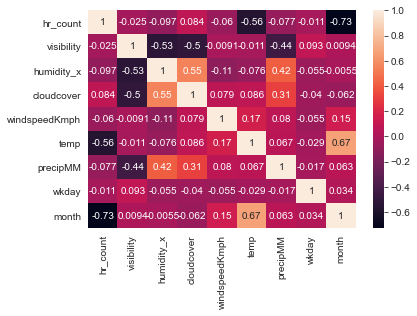

In [76]:
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

sns.heatmap(hr_df3.corr(), annot=True)

### Split dataset

In [342]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
split_ratio = 0.7 # 70%/30% train/test split

# execute split
split = np.random.rand(len(hr_df3)) < split_ratio
train = hr_df3[split]
test = hr_df3[~split]

In [343]:
X_train = train.drop(["hr_count",'date','date_hr'],axis=1)
y_train = train['hr_count'].values

X_test = test.drop(["hr_count",'date','date_hr'],axis=1)
y_test = test['hr_count'].values

In [344]:
X_train.shape

(1905, 10)

In [345]:
X_test.shape

(840, 10)

### Build model

In [81]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [82]:
def cross_val(model):
    pred = cross_val_score(model, X_train, y_train, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

#### Linear Regression

In [83]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [84]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
visibility,-2.448495
humidity_x,-0.521855
cloudcover,0.221671
windspeedKmph,0.252589
temp,-1.086934
precipMM,-1.322001
wkday,0.261123
month,-20.855655
hour,0.579576
holiday,10.795575


In [85]:
cross_val(lin_reg)

-45.15375766753725

In [86]:
pred = lin_reg.predict(X_test)
print_evaluate(y_test, pred)

MAE: 22.65832885355164
MSE: 974.3174840826791
RMSE: 31.2140590773241
R2 Square 0.6823889896536439


#### Decision Tree

In [87]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [88]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [89]:
pred = dt.predict(X_test)
print_evaluate(y_test, pred)

MAE: 13.505856730160998
MSE: 330.0535307350439
RMSE: 18.167375449828846
R2 Square 0.8924081348454547


#### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.datasets as skd
import sklearn.ensemble as ske

clf=RandomForestClassifier(random_state=13,n_estimators=1000)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=13)

In [91]:
pred = clf.predict(X_test)
print_evaluate(y_test, pred)

MAE: 10.517023959646911
MSE: 236.55737704918033
RMSE: 15.380421874876525
R2 Square 0.9228862986070582


#### Extra trees

In [92]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor

In [89]:
extra_tree = ExtraTreeRegressor(random_state=0)

for n_est in [100,200,500,1000,5000]:
    reg = BaggingRegressor(extra_tree, random_state=13,n_estimators=n_est).fit(X_train, y_train)
    print(reg.score(X_test, y_test))

0.9333018476286915
0.934484930405
0.9342330689261453
0.9330781614176576
0.9336196760672024


When n_estimators=200, it performs the best.

In [93]:
extra_tree = ExtraTreeRegressor(random_state=0)
reg1 = BaggingRegressor(extra_tree, random_state=13,n_estimators=200).fit(X_train, y_train)

In [94]:
pred = reg1.predict(X_test)
print_evaluate(y_test, pred)

MAE: 9.569035308953342
MSE: 179.43013351197982
RMSE: 13.39515335903176
R2 Square 0.941508813171944


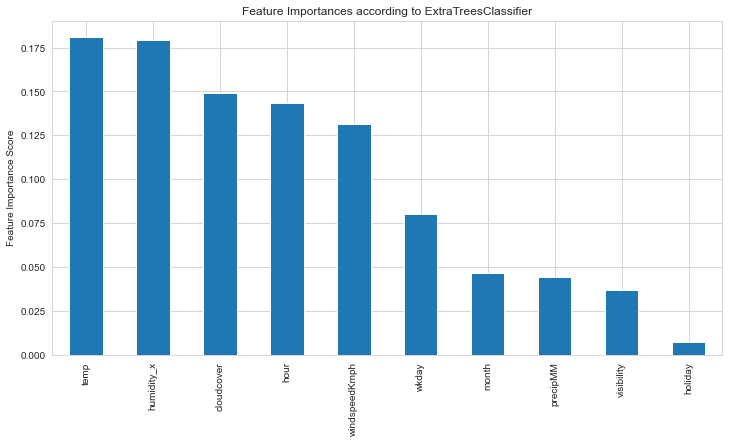

In [100]:
import matplotlib.pyplot as plt
feat_imp = pd.Series(clf.feature_importances_, index = X_train.columns.values).sort_values(ascending=False)
feat_imp[:40].plot(kind='bar', title='Feature Importances according to ExtraTreesClassifier', figsize=(12, 8))
plt.ylabel('Feature Importance Score')
plt.subplots_adjust(bottom=0.3)
plt.show()

(0.0, 450.0)

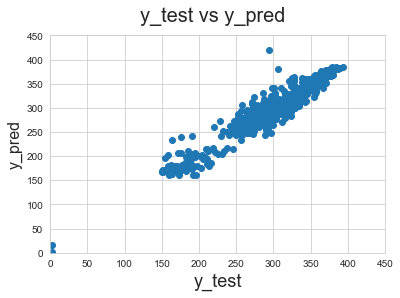

In [101]:
fig = plt.figure()
plt.scatter(y_test,pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 
plt.xlim(0, 450)
plt.ylim(0, 450)

#### Gradient Boosting

In [102]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

Tune the hyperparameters and fit the model with the best fitting performance.

In [103]:
params = {'n_estimators': 500,
          'max_depth': 12,
          'min_samples_split': 5,
          'learning_rate': 0.02,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params, random_state=13)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=12, min_samples_split=5,
                          n_estimators=500, random_state=13)

In [104]:
pred = reg.predict(X_test)
print_evaluate(y_test, pred)

MAE: 10.539139584715617
MSE: 231.05269396743697
RMSE: 15.200417558982943
R2 Square 0.9246807321297975


From the comparison of these models, the one performs the best should be Extra trees model, with RMSE: 13.489760871675971 and R2 Square 0.934484930405

### Evaluate the effect of different holidays

In [105]:
path3 = 'United States Holidays & Celebrations.csv'
US_holiday = pd.read_csv(path3)
US_holiday.head()

,Event,date
0,New Years Day,2020-01-01
1,Martin Luther King Jr. Day,2020-01-20
2,Valentines Day,2020-02-14
3,President's Day,2020-02-17
4,St. Patricks Day,2020-03-17


In [106]:
hr_df4 = hr_df3.merge(US_holiday, on='date', how='left')
hr_df4.head()

,date_hr,hr_count,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM,wkday,month,date,hour,holiday,Event
0,2020-03-14 14,550,10,20.756364,23,12,68.406145,0.0,6,3,2020-03-14,14,0,NaN
1,2020-02-21 16,393,10,18.536896,1,11,42.603969,0.0,5,2,2020-02-21,16,0,NaN
2,2020-02-14 12,392,10,27.153061,3,20,42.353214,0.0,5,2,2020-02-14,12,1,Valentines Day
3,2020-02-21 18,390,10,19.353846,1,8,41.306923,0.0,5,2,2020-02-21,18,0,NaN
4,2020-02-21 15,388,10,17.512887,2,12,42.401495,0.0,5,2,2020-02-21,15,0,NaN


#### Add the feature, 'stay_at_home', and evaluate its effect

In [107]:
hr_df6 = hr_df4

In [108]:
def f(row):
    if row['date'] >= '2020-03-30' and row['date'] <= '2020-06-08':
        val = 1
    else:
        val = 0
    return val

In [109]:
hr_df6['stay_at_home'] = hr_df6.apply(f, axis=1)

In [110]:
hr_df6.head()

,date_hr,hr_count,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM,wkday,month,date,hour,holiday,Event,stay_at_home
0,2020-03-14 14,550,10,20.756364,23,12,68.406145,0.0,6,3,2020-03-14,14,0,NaN,0
1,2020-02-21 16,393,10,18.536896,1,11,42.603969,0.0,5,2,2020-02-21,16,0,NaN,0
2,2020-02-14 12,392,10,27.153061,3,20,42.353214,0.0,5,2,2020-02-14,12,1,Valentines Day,0
3,2020-02-21 18,390,10,19.353846,1,8,41.306923,0.0,5,2,2020-02-21,18,0,NaN,0
4,2020-02-21 15,388,10,17.512887,2,12,42.401495,0.0,5,2,2020-02-21,15,0,NaN,0


In [111]:
split = np.random.rand(len(hr_df6)) < split_ratio
train = hr_df6[split]
test = hr_df6[~split]

In [112]:
X_train = train.drop(["hr_count",'date','date_hr','Event'],axis=1)
y_train = train['hr_count'].values

X_test = test.drop(["hr_count",'date','date_hr','Event'],axis=1)
y_test = test['hr_count'].values

In [113]:
clf = ensemble.ExtraTreesClassifier(random_state=1,n_estimators=100)
selector = clf.fit(X_train, y_train)

In [114]:
pred = clf.predict(X_test)
print_evaluate(y_test, pred)

MAE: 9.827586206896552
MSE: 198.0677764565993
RMSE: 14.073655404925875
R2 Square 0.9343007045008089


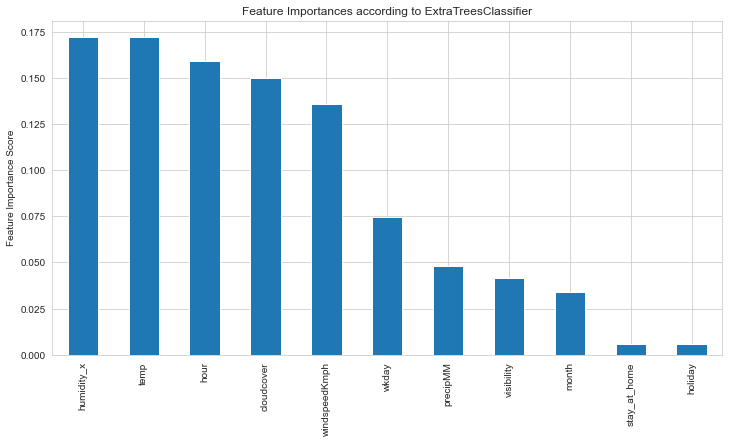

In [115]:
feat_imp = pd.Series(clf.feature_importances_, index = X_train.columns.values).sort_values(ascending=False)
feat_imp[:40].plot(kind='bar', title='Feature Importances according to ExtraTreesClassifier', figsize=(12, 8))
plt.ylabel('Feature Importance Score')
plt.subplots_adjust(bottom=0.3)
#plt.savefig('1.png')
plt.show()

#### Encode the 'Event' feature and evaluate the effects of different holidays

In [116]:
cols_to_transform = [ 'Event' ]
hr_df5 = pd.get_dummies(hr_df4,columns = cols_to_transform )

In [117]:
hr_df5.head()

,date_hr,hr_count,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM,wkday,month,date,hour,holiday,stay_at_home,Event_Cinco De Mayo,Event_Martin Luther King Jr. Day,Event_Mother's Day,Event_President's Day,Event_St. Patricks Day,Event_Valentines Day
0,2020-03-14 14,550,10,20.756364,23,12,68.406145,0.0,6,3,2020-03-14,14,0,0,0,0,0,0,0,0
1,2020-02-21 16,393,10,18.536896,1,11,42.603969,0.0,5,2,2020-02-21,16,0,0,0,0,0,0,0,0
2,2020-02-14 12,392,10,27.153061,3,20,42.353214,0.0,5,2,2020-02-14,12,1,0,0,0,0,0,0,1
3,2020-02-21 18,390,10,19.353846,1,8,41.306923,0.0,5,2,2020-02-21,18,0,0,0,0,0,0,0,0
4,2020-02-21 15,388,10,17.512887,2,12,42.401495,0.0,5,2,2020-02-21,15,0,0,0,0,0,0,0,0


In [118]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
split_ratio = 0.7 # 70%/30% train/test split

# execute split
split = np.random.rand(len(hr_df5)) < split_ratio
train = hr_df5[split]
test = hr_df5[~split]

In [119]:
train.head()

,date_hr,hr_count,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM,wkday,month,date,hour,holiday,stay_at_home,Event_Cinco De Mayo,Event_Martin Luther King Jr. Day,Event_Mother's Day,Event_President's Day,Event_St. Patricks Day,Event_Valentines Day
2,2020-02-14 12,392,10,27.153061,3,20,42.353214,0.0,5,2,2020-02-14,12,1,0,0,0,0,0,0,1
3,2020-02-21 18,390,10,19.353846,1,8,41.306923,0.0,5,2,2020-02-21,18,0,0,0,0,0,0,0,0
4,2020-02-21 15,388,10,17.512887,2,12,42.401495,0.0,5,2,2020-02-21,15,0,0,0,0,0,0,0,0
5,2020-02-14 13,388,10,26.734536,3,19,41.564588,0.0,5,2,2020-02-14,13,1,0,0,0,0,0,0,1
6,2020-02-13 18,388,10,51.059278,79,14,54.069021,0.3,4,2,2020-02-13,18,0,0,0,0,0,0,0,0


In [120]:
X_train = train.drop(["hr_count",'date','date_hr','holiday'],axis=1)
y_train = train['hr_count'].values

X_test = test.drop(["hr_count",'date','date_hr','holiday'],axis=1)
y_test = test['hr_count'].values

In [121]:
clf = BaggingRegressor(extra_tree, random_state=13,n_estimators=200).fit(X_train, y_train)

In [122]:
pred = clf.predict(X_test)
print_evaluate(y_test, pred)

MAE: 9.484113557358054
MSE: 251.69778192352263
RMSE: 15.864986036033017
R2 Square 0.9165160267901492


In [137]:
feat_imp

humidity_x       0.172233
temp             0.172229
hour             0.159202
cloudcover       0.149877
windspeedKmph    0.135993
wkday            0.074851
precipMM         0.048201
visibility       0.041713
month            0.033993
stay_at_home     0.005858
holiday          0.005850
dtype: float64

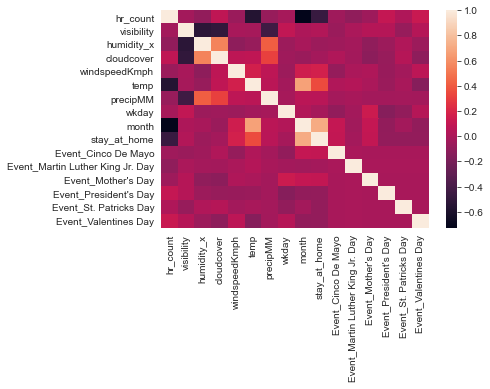

In [127]:
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
#plt.style.use("fivethirtyeight")

sns.heatmap(hr_df5.corr())

In [128]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [129]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
visibility,-2.212325
humidity_x,-0.551099
cloudcover,0.224777
windspeedKmph,0.371860
temp,-1.012864
precipMM,-0.253496
wkday,0.341140
month,-22.126940
hour,0.686086
stay_at_home,2.715264


Adding the stay_at_home variablea and the encoded holiday variable didn't improve the fitting performance. So the one performs the best should still be the Extra trees model (n_estimators=200) built based on table, hr_df3, with RMSE: 13.489760871675971 and R2 Square 0.934484930405 

#### Develop the days with missing count values

In [151]:
extra_tree = ExtraTreeRegressor(random_state=0)
reg1 = BaggingRegressor(extra_tree, random_state=13,n_estimators=200).fit(X_train, y_train)
pred = reg1.predict(X_test)
print_evaluate(y_test, pred)

MAE: 9.484113557358054
MSE: 251.69778192352263
RMSE: 15.864986036033017
R2 Square 0.9165160267901492


In [152]:
X_test.head()

,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM,wkday,month,hour,stay_at_home,Event_Cinco De Mayo,Event_Martin Luther King Jr. Day,Event_Mother's Day,Event_President's Day,Event_St. Patricks Day,Event_Valentines Day
0,10,20.756364,23,12,68.406145,0.0,6,3,14,0,0,0,0,0,0,0
1,10,18.536896,1,11,42.603969,0.0,5,2,16,0,0,0,0,0,0,0
11,10,20.299479,1,14,40.352656,0.0,5,2,13,0,0,0,0,0,0,0
12,10,24.807292,3,17,39.585781,0.0,5,2,16,0,0,0,0,0,0,1
13,10,35.195312,57,8,55.661094,0.0,3,2,16,0,0,0,0,0,0,0


In [346]:
hr_df3.head()

,date_hr,hr_count,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM,wkday,month,date,hour,holiday
0,2020-03-14 14,550,10,20.756364,23,12,68.406145,0.0,6,3,2020-03-14,14,0
1,2020-02-21 16,393,10,18.536896,1,11,42.603969,0.0,5,2,2020-02-21,16,0
2,2020-02-14 12,392,10,27.153061,3,20,42.353214,0.0,5,2,2020-02-14,12,1
3,2020-02-21 18,390,10,19.353846,1,8,41.306923,0.0,5,2,2020-02-21,18,0
4,2020-02-21 15,388,10,17.512887,2,12,42.401495,0.0,5,2,2020-02-21,15,0


In [142]:
hr_df3_dt = hr_df3["date"].tolist()
hr_df3_dt = list(set(hr_df3_dt))
hr_df3_dt.sort()

In [143]:
hr_df3_dtlt = []

for value in hr_df3_dt:
    datetime_object = datetime.strptime(value, '%Y-%m-%d')
    hr_df3_dtlt.append(datetime_object.date())

Find the missing date:

In [164]:
from datetime import date, timedelta
d = hr_df3_dtlt
date_set = set(d[0] + timedelta(x) for x in range((d[-1] - d[0]).days))
missing = sorted(date_set - set(d))

In [166]:
missing[0:5]

[datetime.date(2020, 1, 8),
 datetime.date(2020, 1, 9),
 datetime.date(2020, 1, 10),
 datetime.date(2020, 1, 11),
 datetime.date(2020, 1, 12)]

In [161]:
date3 = []
for value in missing:
    date = value.strftime('%Y-%m-%d')
    date3.append(date)

In [248]:
#date3
weather_api2 = weather_api1
weather_api2 = weather_api2[weather_api2['date2'].isin(date3)]

In [249]:
weather_api2.head()

,date_hr,time,date2,humidity,cloudcover,windspeedKmph,visibility,tempC,precipMM
168,2020-01-08 00,00:00:00,2020-01-08,87,3,11,10,1,0.0
169,2020-01-08 01,01:00:00,2020-01-08,86,4,12,10,1,0.0
170,2020-01-08 02,02:00:00,2020-01-08,86,4,13,10,1,0.0
171,2020-01-08 03,03:00:00,2020-01-08,85,5,14,10,1,0.0
172,2020-01-08 04,04:00:00,2020-01-08,84,7,14,10,1,0.0


In [251]:
weather_api2['temp'] = weather_api2['tempC'] * 9 / 5 + 32
weather_api2.rename(columns={"humidity":"humidity_x"}, inplace=True)
weather_api2.rename(columns={"date2":"date"}, inplace=True)

<ipython-input-251-893f66d17f33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_api2['temp'] = weather_api2['tempC'] * 9 / 5 + 32
C:\Users\yuezh\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [252]:
date1 = weather_api2["date_hr"].str.split(" ", expand = True) 
weather_api2["hour"]= date1[1] 
holiday_list = ['2020-01-01','2020-01-20','2020-02-14','2020-02-17','2020-03-17','2020-05-05','2020-05-10','2020-05-25','2020-06-21']
weather_api2.loc[weather_api2['date'].isin(holiday_list), 'holiday'] = '1'
weather_api2['holiday'] = weather_api2['holiday'].fillna('0')
weather_api2.head()

<ipython-input-252-1082db6bc5a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_api2["hour"]= date1[1]
C:\Users\yuezh\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\yuezh\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,date_hr,time,date,humidity_x,cloudcover,windspeedKmph,visibility,tempC,precipMM,temp,hour,holiday
168,2020-01-08 00,00:00:00,2020-01-08,87,3,11,10,1,0.0,33.8,00,0
169,2020-01-08 01,01:00:00,2020-01-08,86,4,12,10,1,0.0,33.8,01,0
170,2020-01-08 02,02:00:00,2020-01-08,86,4,13,10,1,0.0,33.8,02,0
171,2020-01-08 03,03:00:00,2020-01-08,85,5,14,10,1,0.0,33.8,03,0
172,2020-01-08 04,04:00:00,2020-01-08,84,7,14,10,1,0.0,33.8,04,0


In [234]:
wkday3 = []
month3 = []

for value in weather_api2['date_hr']:
    value = value.split(' ')[0]
    year, month, day = (int(x) for x in value.split('-'))  
    answer = datetime(year, month, day).isoweekday()
    wkday3.append(answer)
    month3.append(month)

In [244]:
len(wkday3)

864

In [253]:
weather_api2.index = range(0,864)

In [254]:
i = 0
for item in wkday3:
    weather_api2.loc[i,13]=wkday3[i]
    i = i+1  

C:\Users\yuezh\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\yuezh\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [258]:
i = 0
for item in month3:
    weather_api2.loc[i,14] = month3[i]
    i = i+1

C:\Users\yuezh\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\yuezh\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [259]:
weather_api2.isnull().sum()

date_hr          0
time             0
date             0
humidity_x       0
cloudcover       0
windspeedKmph    0
visibility       0
tempC            0
precipMM         0
temp             0
hour             0
holiday          0
13               0
14               0
dtype: int64

In [272]:
weather_api2.rename(columns={13:"wkday"}, inplace=True)
weather_api2.rename(columns={14:"month"}, inplace=True)

C:\Users\yuezh\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [273]:
weather_api2.head()

,date_hr,time,date,humidity_x,cloudcover,windspeedKmph,visibility,tempC,precipMM,temp,hour,holiday,wkday,month
0,2020-01-08 00,00:00:00,2020-01-08,87,3,11,10,1,0.0,33.8,00,0,3.0,1.0
1,2020-01-08 01,01:00:00,2020-01-08,86,4,12,10,1,0.0,33.8,01,0,3.0,1.0
2,2020-01-08 02,02:00:00,2020-01-08,86,4,13,10,1,0.0,33.8,02,0,3.0,1.0
3,2020-01-08 03,03:00:00,2020-01-08,85,5,14,10,1,0.0,33.8,03,0,3.0,1.0
4,2020-01-08 04,04:00:00,2020-01-08,84,7,14,10,1,0.0,33.8,04,0,3.0,1.0


In [275]:
missing_train = weather_api2.drop(['date','date_hr','time','tempC'],axis=1)

In [263]:
train = hr_df3[split]
X_train = train.drop(["hr_count",'date','date_hr'],axis=1)

In [264]:
X_train.head()

,visibility,humidity_x,cloudcover,windspeedKmph,temp,precipMM,wkday,month,hour,holiday
2,10,27.153061,3,20,42.353214,0.0,5,2,12,1
3,10,19.353846,1,8,41.306923,0.0,5,2,18,0
4,10,17.512887,2,12,42.401495,0.0,5,2,15,0
5,10,26.734536,3,19,41.564588,0.0,5,2,13,1
6,10,51.059278,79,14,54.069021,0.3,4,2,18,0


In [276]:
missing_train.head()

,humidity_x,cloudcover,windspeedKmph,visibility,precipMM,temp,hour,holiday,wkday,month
0,87,3,11,10,0.0,33.8,00,0,3.0,1.0
1,86,4,12,10,0.0,33.8,01,0,3.0,1.0
2,86,4,13,10,0.0,33.8,02,0,3.0,1.0
3,85,5,14,10,0.0,33.8,03,0,3.0,1.0
4,84,7,14,10,0.0,33.8,04,0,3.0,1.0


Get the predicted pedestrian count values based on the model with the best performance, (extra trees model (n_estimators=200) built based on table, hr_df3)

In [279]:
extra_tree = ExtraTreeRegressor(random_state=0)
reg1 = BaggingRegressor(extra_tree, random_state=13,n_estimators=200).fit(X_train, y_train)
pred = reg1.predict(missing_train)
weather_api2["Predicted Count"] = pred
weather_api2.head()

<ipython-input-279-6e99fa7b4fd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_api2["Predicted Count"] = pred


,date_hr,time,date,humidity_x,cloudcover,windspeedKmph,visibility,tempC,precipMM,temp,hour,holiday,wkday,month,Predicted Count
0,2020-01-08 00,00:00:00,2020-01-08,87,3,11,10,1,0.0,33.8,00,0,3.0,1.0,206.790
1,2020-01-08 01,01:00:00,2020-01-08,86,4,12,10,1,0.0,33.8,01,0,3.0,1.0,206.830
2,2020-01-08 02,02:00:00,2020-01-08,86,4,13,10,1,0.0,33.8,02,0,3.0,1.0,206.095
3,2020-01-08 03,03:00:00,2020-01-08,85,5,14,10,1,0.0,33.8,03,0,3.0,1.0,227.730
4,2020-01-08 04,04:00:00,2020-01-08,84,7,14,10,1,0.0,33.8,04,0,3.0,1.0,233.615


The column 'Predicted Count' shows the estimated pedestrain count for the missing days.